# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

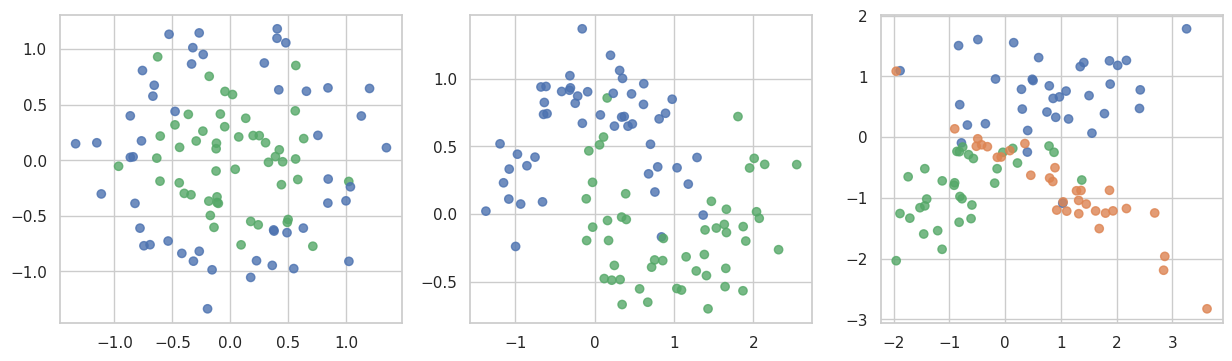

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

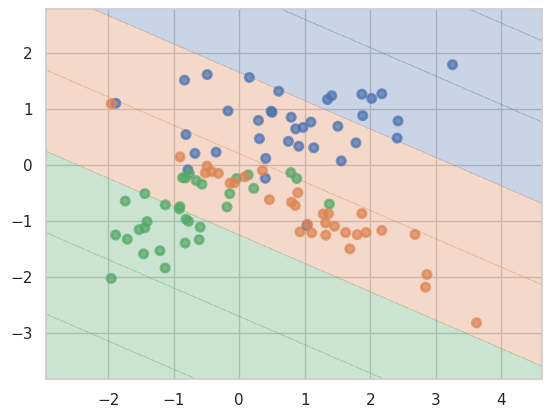

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy Train: 1.0, Accuracy Test: 0.65


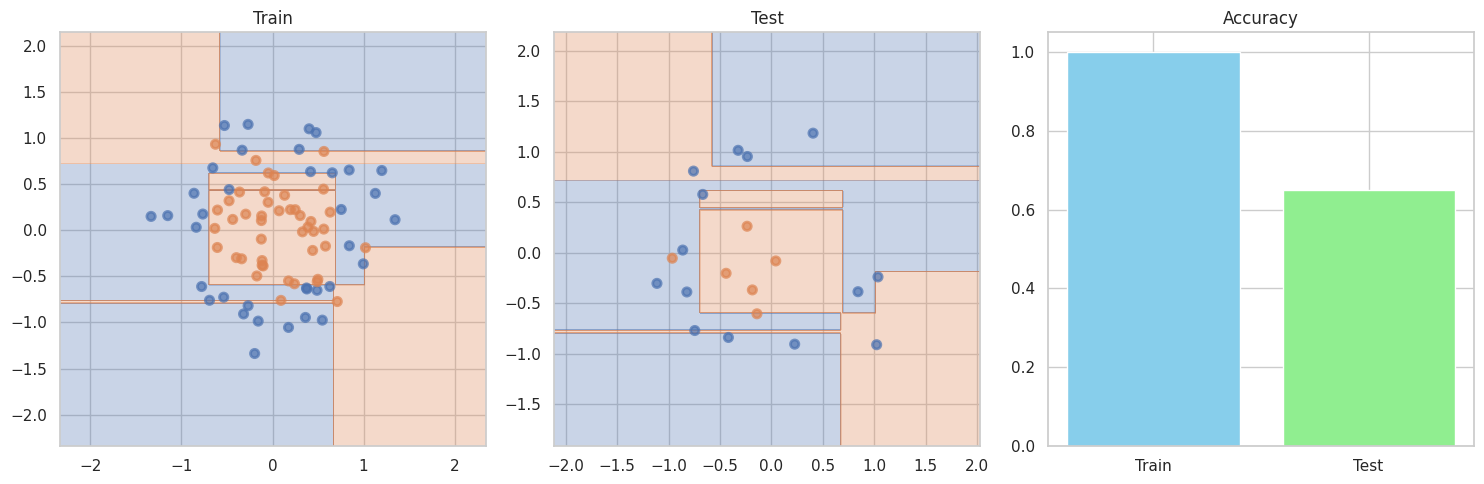

Accuracy Train: 1.0, Accuracy Test: 0.95


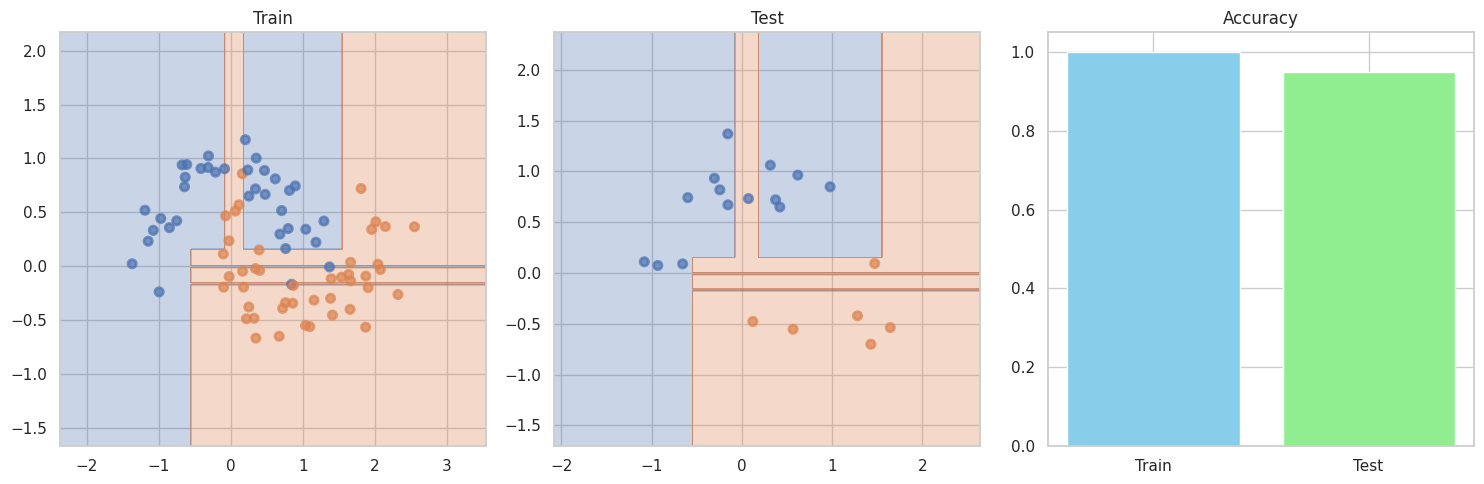

Accuracy Train: 1.0, Accuracy Test: 0.7


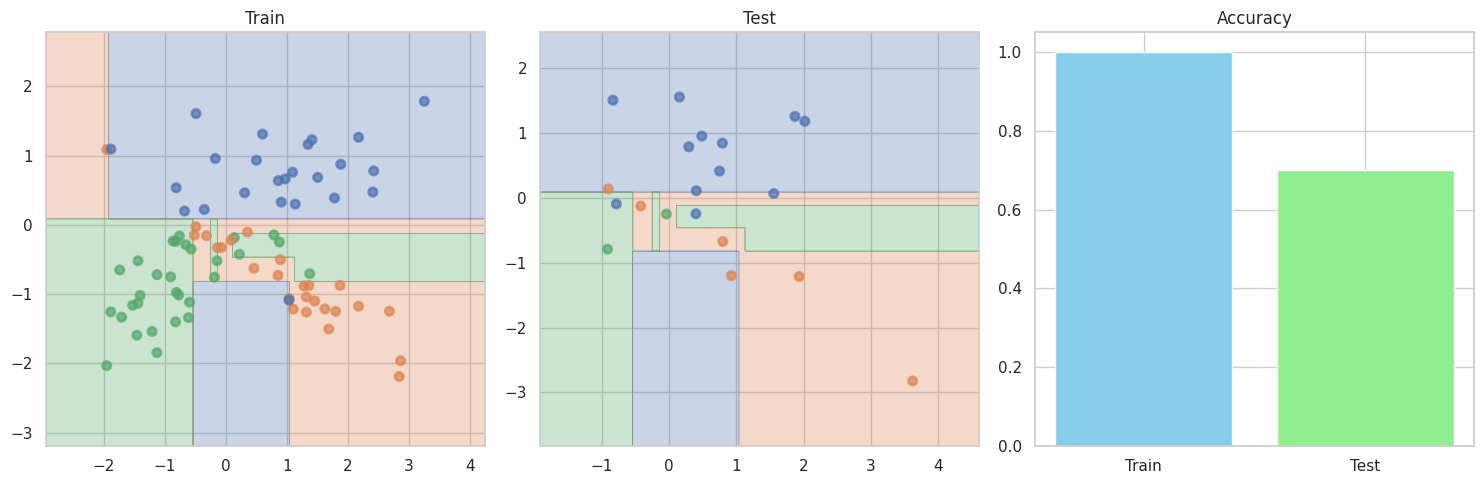

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Accuracy Train: {accuracy_train}, Accuracy Test: {accuracy_test}')
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plot_surface(model, X_train, y_train)
    plt.title('Train')

    plt.subplot(1, 3, 2)
    plot_surface(model, X_test, y_test)
    plt.title('Test')

    plt.subplot(1, 3, 3)
    labels = ['Train', 'Test']
    accuracies = [accuracy_train, accuracy_test]
    plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

__Ответ:__ Как можно заметить, деревья переобучились, их TrainAccuracy = 1. Если посмотреть на грфики, можно увидеть, что дерево сильно подогнано под обучающую выборку и имеет много областей, которые нужны только для предсказания одного конкретного элемента выборки. В общем ведет себя, как любой уважающий себя школьник на лабе по физике: жестко подгоняет все под правильные ответы.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4}
Accuracy Train: 0.925, Accuracy Test: 0.75


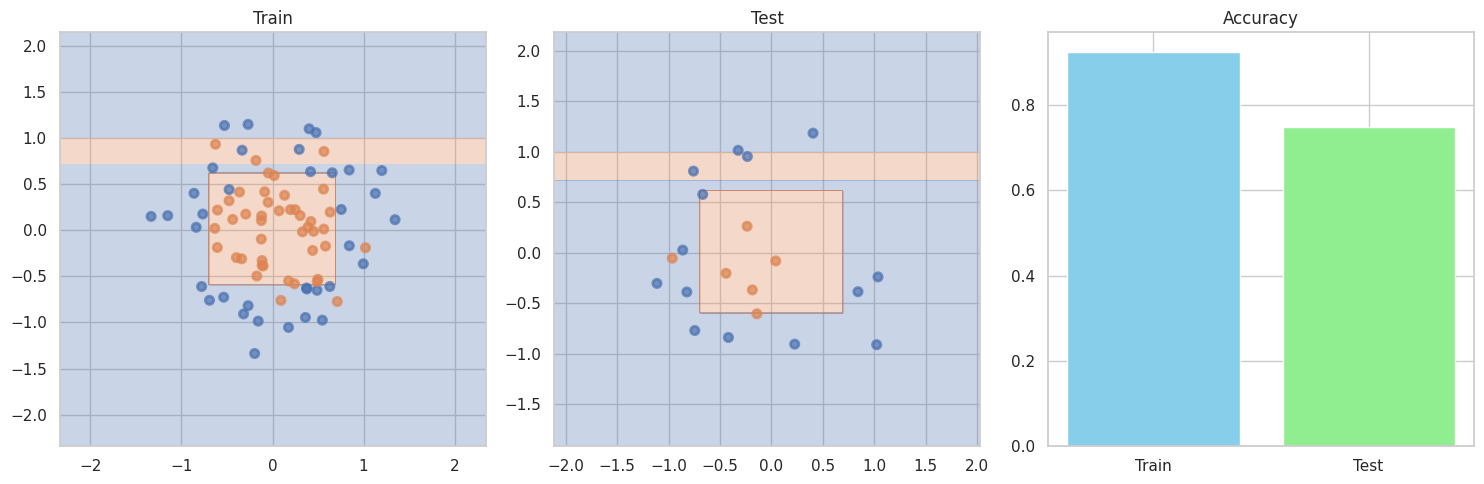

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 2}
Accuracy Train: 0.9125, Accuracy Test: 1.0


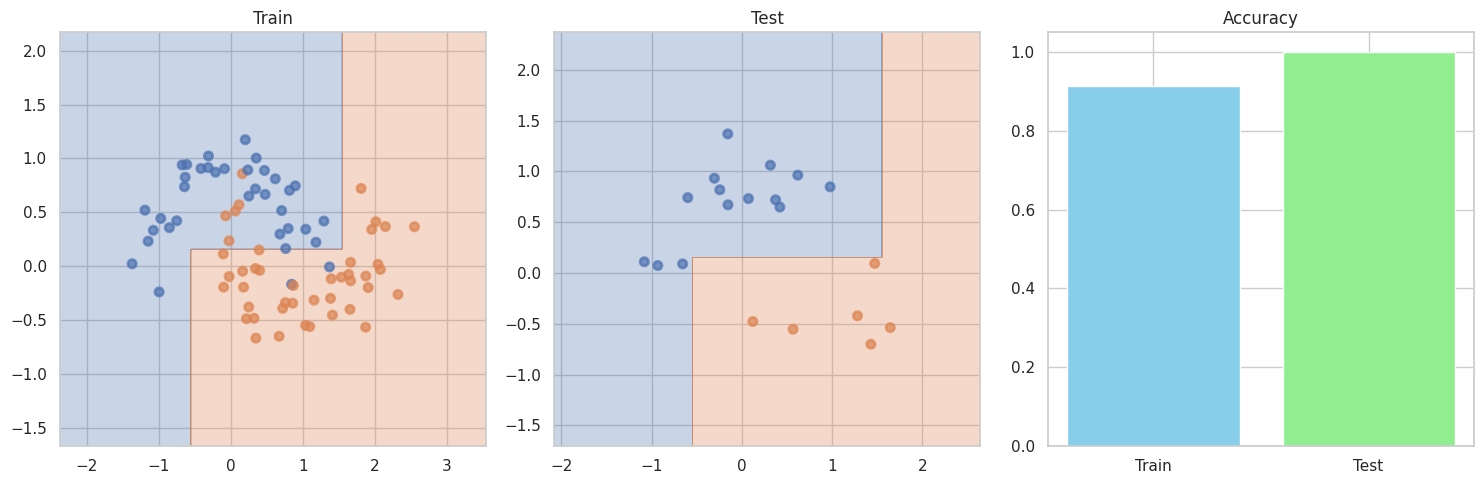

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2}
Accuracy Train: 0.8875, Accuracy Test: 0.75


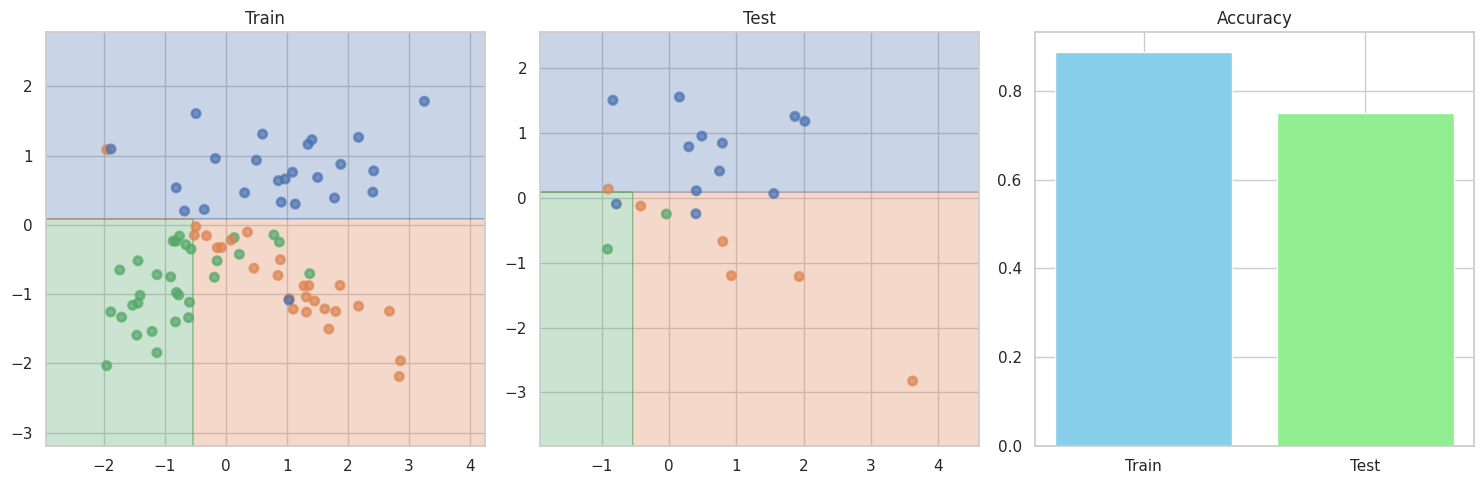

In [9]:
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'max_depth': np.arange(1, 20),
        'min_samples_leaf': np.arange(30, 1, -1)
    }

    dtree = DecisionTreeClassifier(random_state=42)

    grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    print(f'Best Parameters: {best_params}')
    print(f'Accuracy Train: {accuracy_train}, Accuracy Test: {accuracy_test}')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plot_surface(best_model, X_train, y_train)
    plt.title('Train')

    plt.subplot(1, 3, 2)
    plot_surface(best_model, X_test, y_test)
    plt.title('Test')

    plt.subplot(1, 3, 3)
    plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['skyblue', 'lightgreen'])
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

__Ответ:__ На всех трех дата-сетах ~точность~ accuracy удалось увеличить. Даже на втором наборе данных, с первоначальным значением 0.95 удалось сделать прогресс до 1. Разделяющие плоскости стали более аккуратные и понятные, никаких странных полос для одного объекта, только четкие кластеры.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Ник: Артём Некрасов

A. find_best_split - [ссылка](https://contest.yandex.ru/contest/56884/run-report/102607854), id посылки: 102607854

In [10]:
!wget  -O 'hw5code.py' -q https://www.dropbox.com/scl/fi/orwu3zjdaz568ayo9gr9l/hw5code.py?rlkey=80okp8rp4aaaosntny9brvyq3&dl=0

In [11]:
from hw5code import find_best_split

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget  -O 'students.csv' -q https://www.dropbox.com/scl/fi/bewfgy41qfblglk9utp40/students.csv?rlkey=2wbb7hajcq801i5ized85jy2p&dl=0

df = pd.read_csv('students.csv', sep=',')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


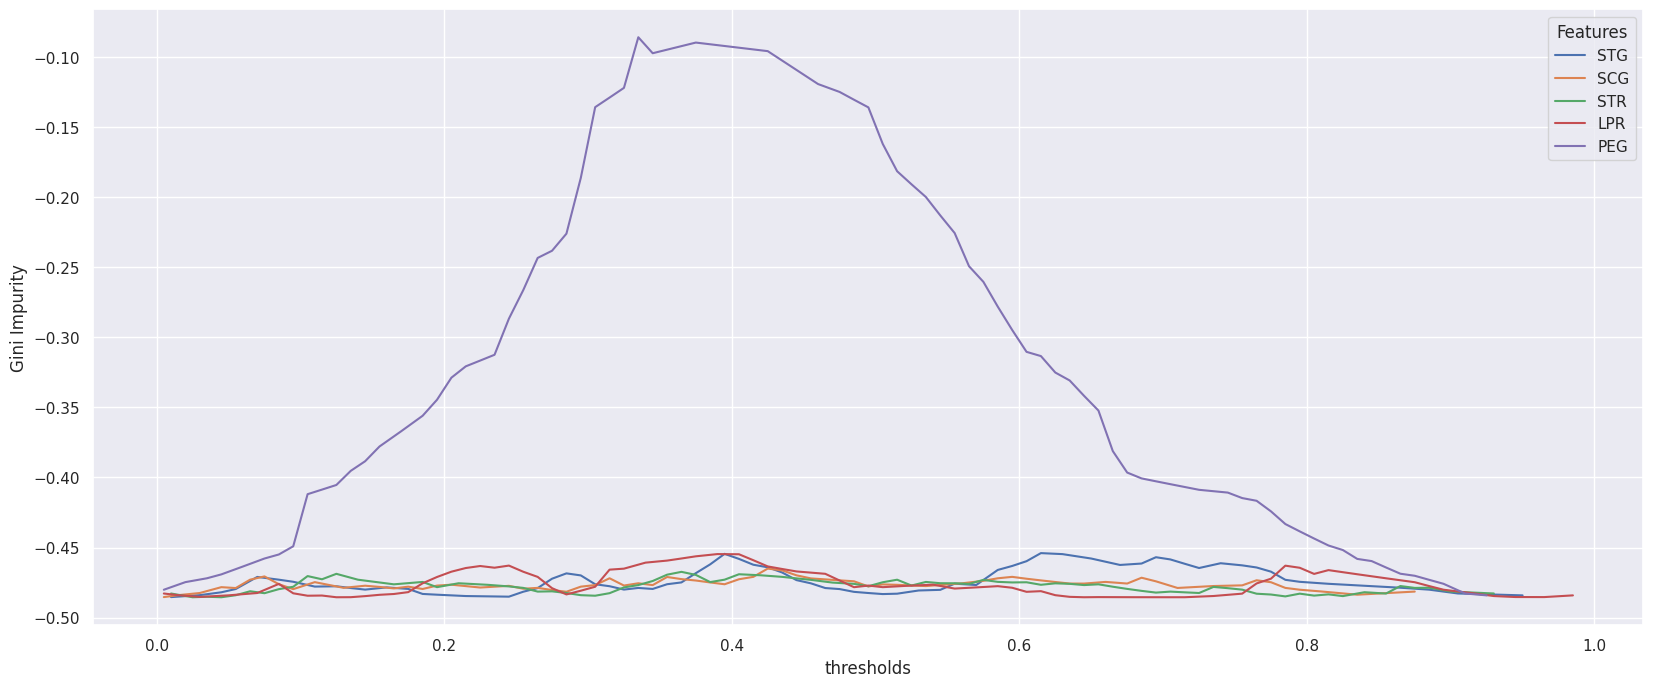

In [13]:
def plot_gini_impurity(df):
    sns.set(rc={'figure.figsize': (20, 8)})

    for feature_col in df.columns[:-1]:
        feature_vector = np.array(df[feature_col])
        target_vector = np.array(df['UNS'])
        thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
        sns.lineplot(x=thresholds, y=ginis, label=feature_col)

    plt.legend(title='Features')
    plt.xlabel('thresholds')
    plt.ylabel('Gini Impurity')
    plt.show()

plot_gini_impurity(df)

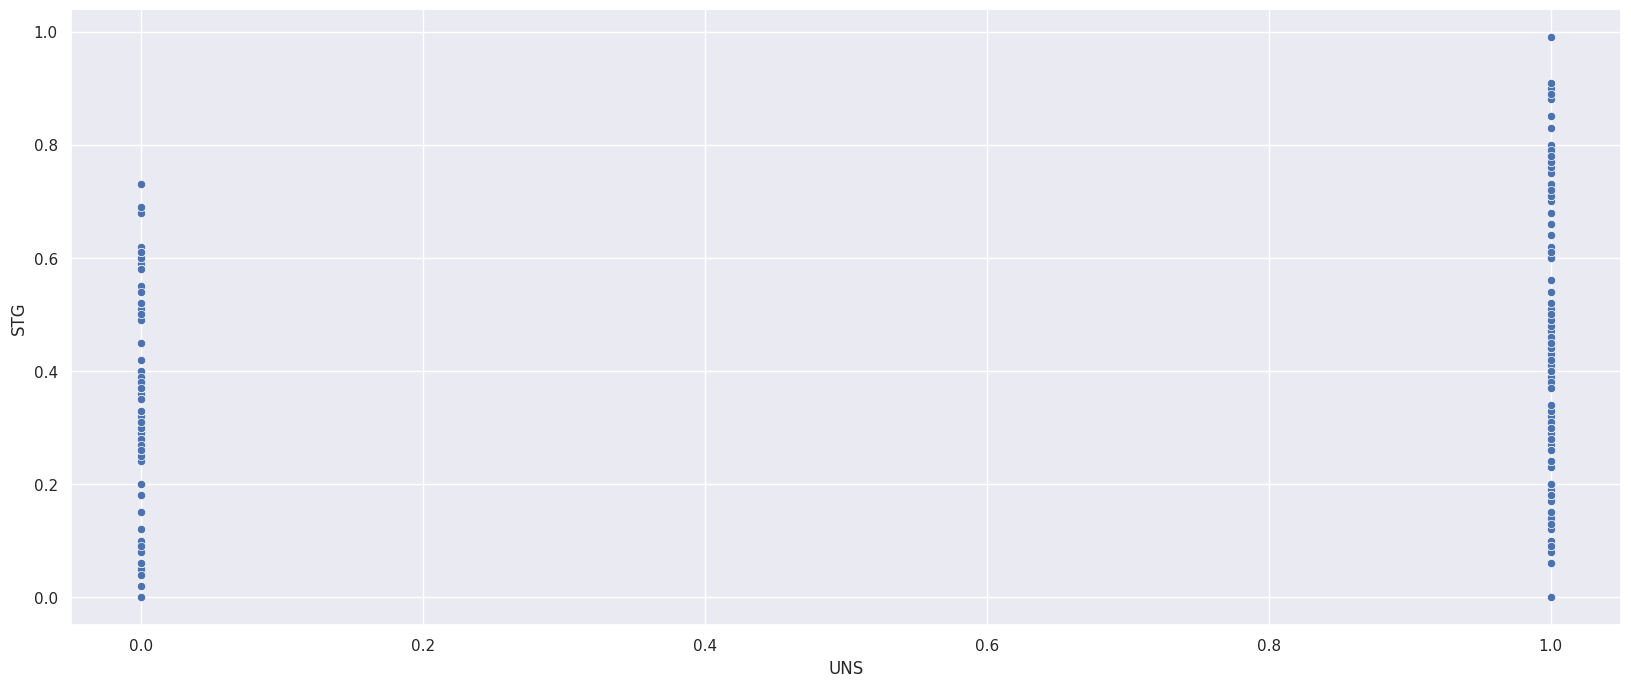

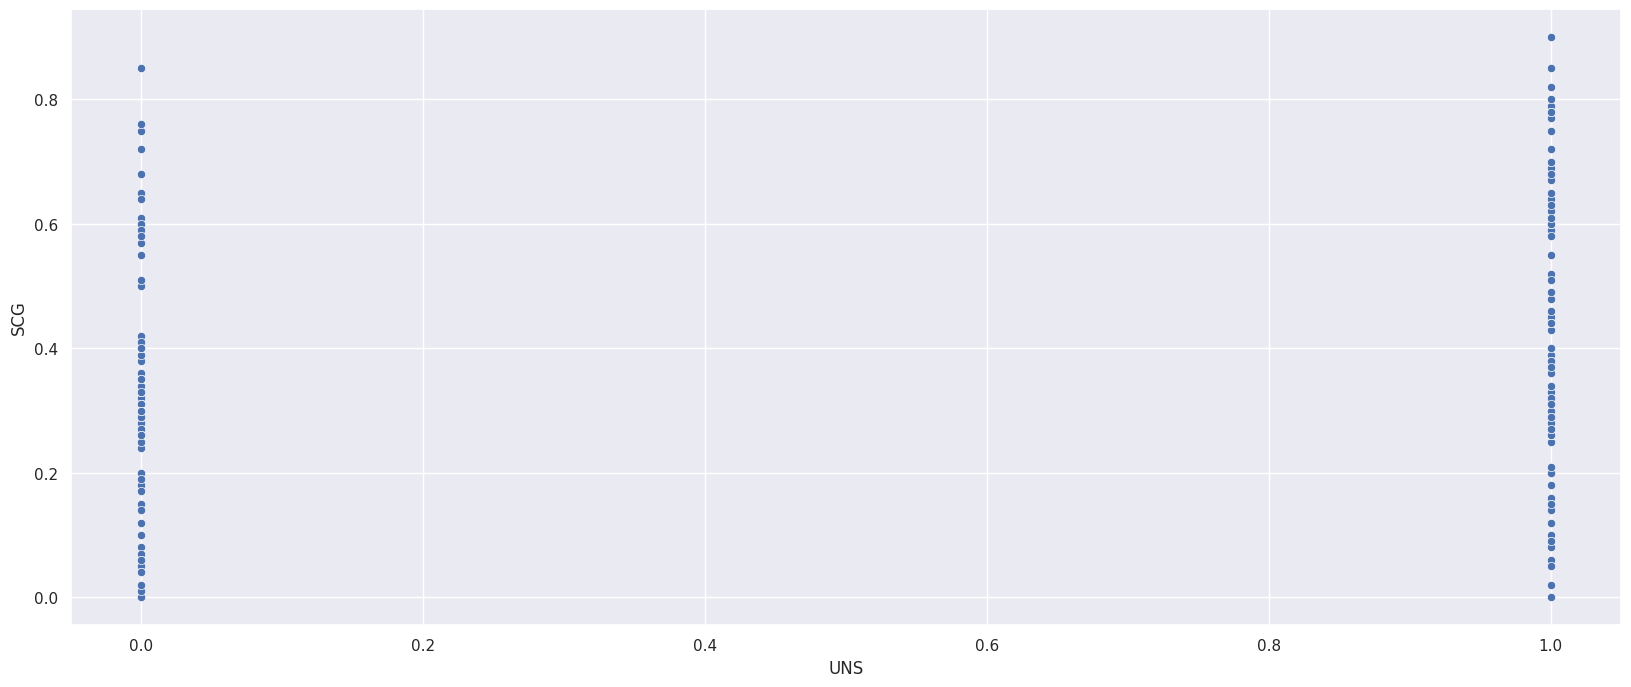

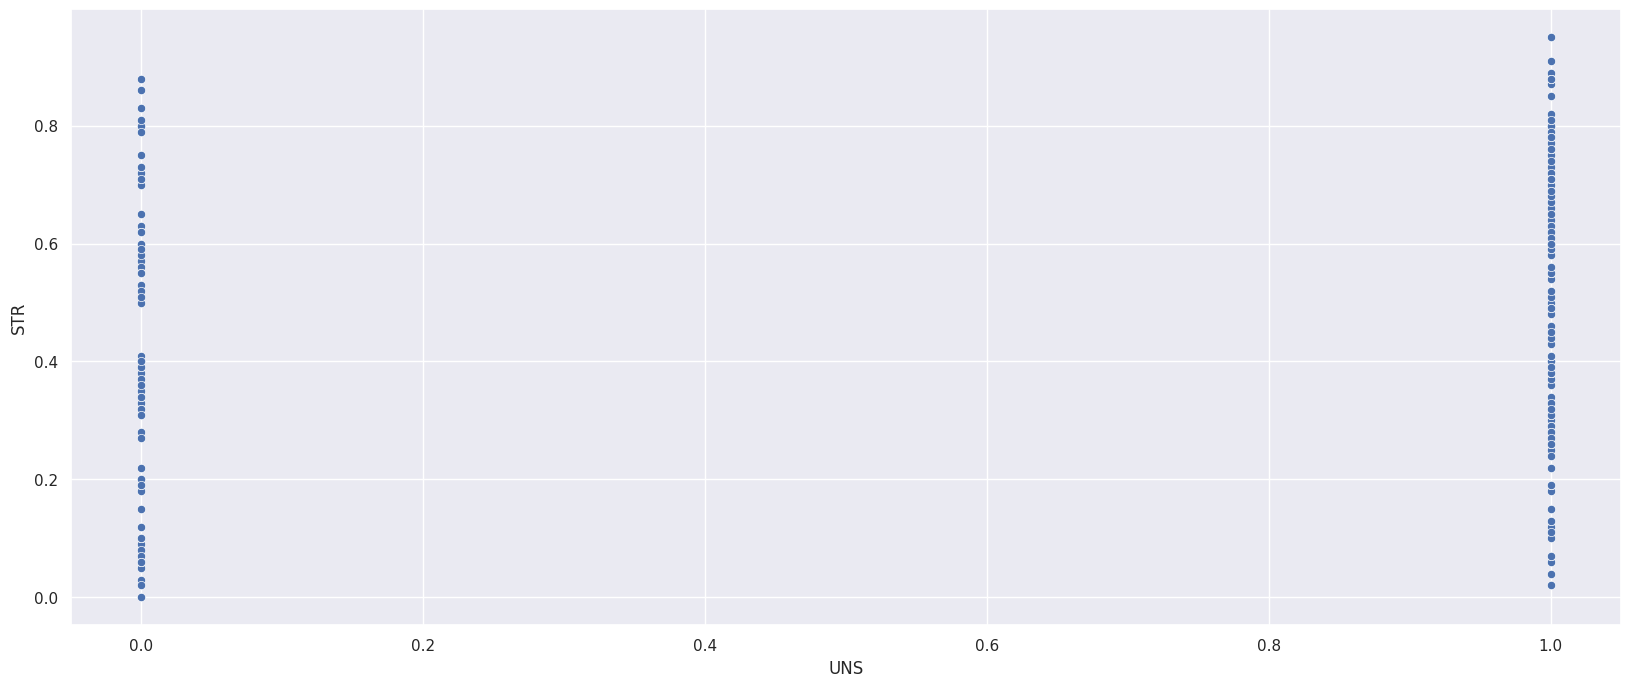

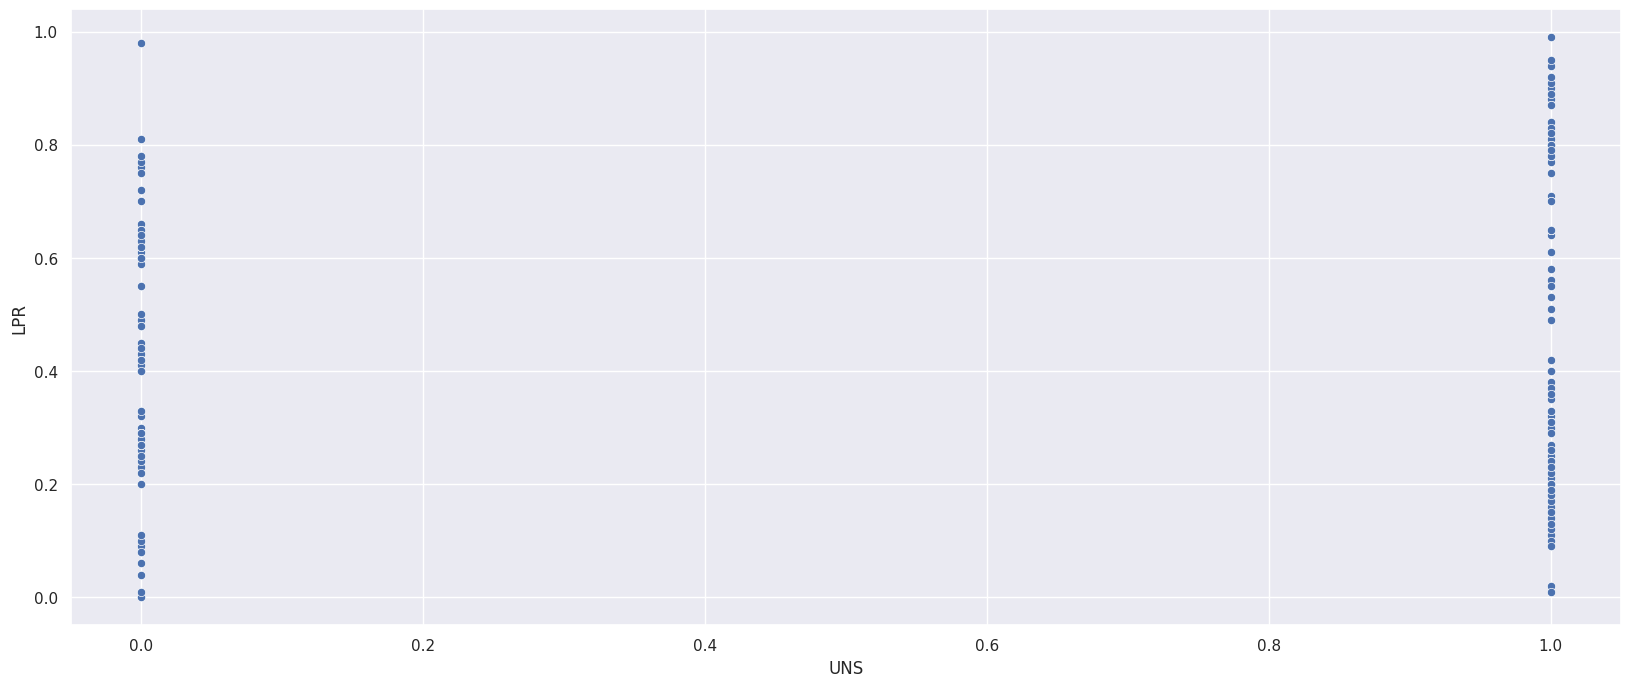

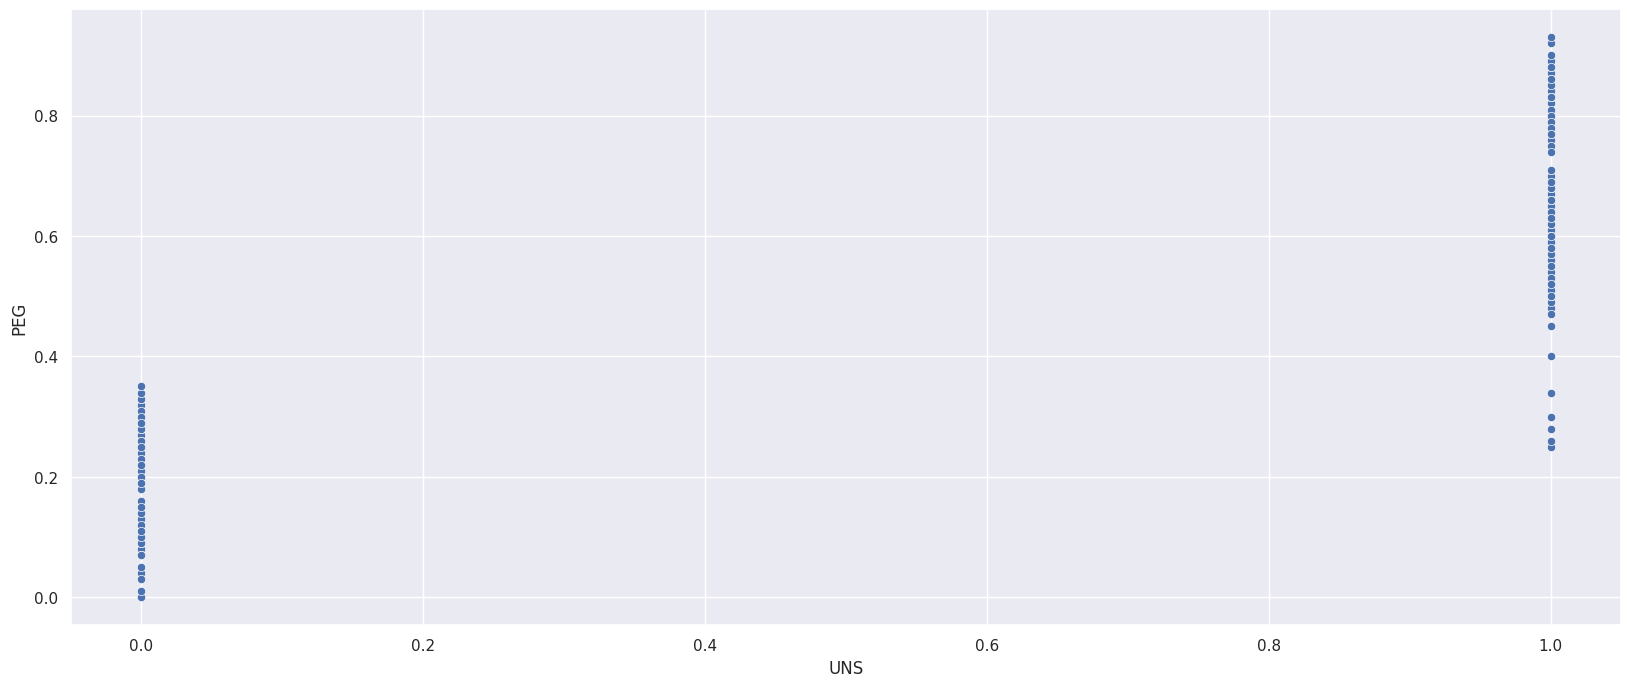

In [14]:
def plot_scatterplots(df):
    sns.set(rc={'figure.figsize': (20, 8)})

    for feature_col in df.columns[:-1]:
        sns.scatterplot(x=df['UNS'], y=df[feature_col])
        plt.xlabel('UNS')
        plt.ylabel(feature_col)
        plt.show()

plot_scatterplots(df)

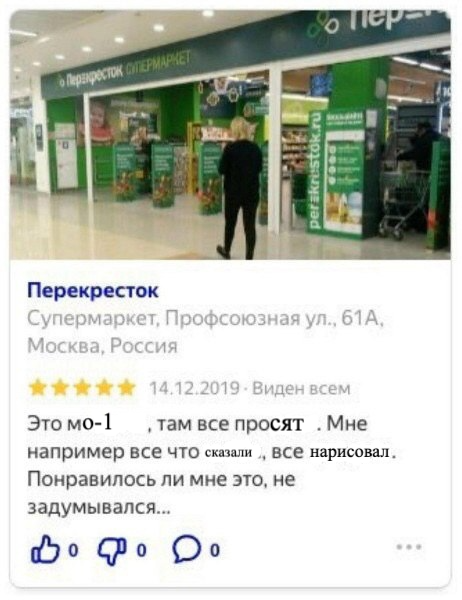

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

*Видимо все таки задуматься придется. Попробуем отрисовать как-нибудь по-другому.*

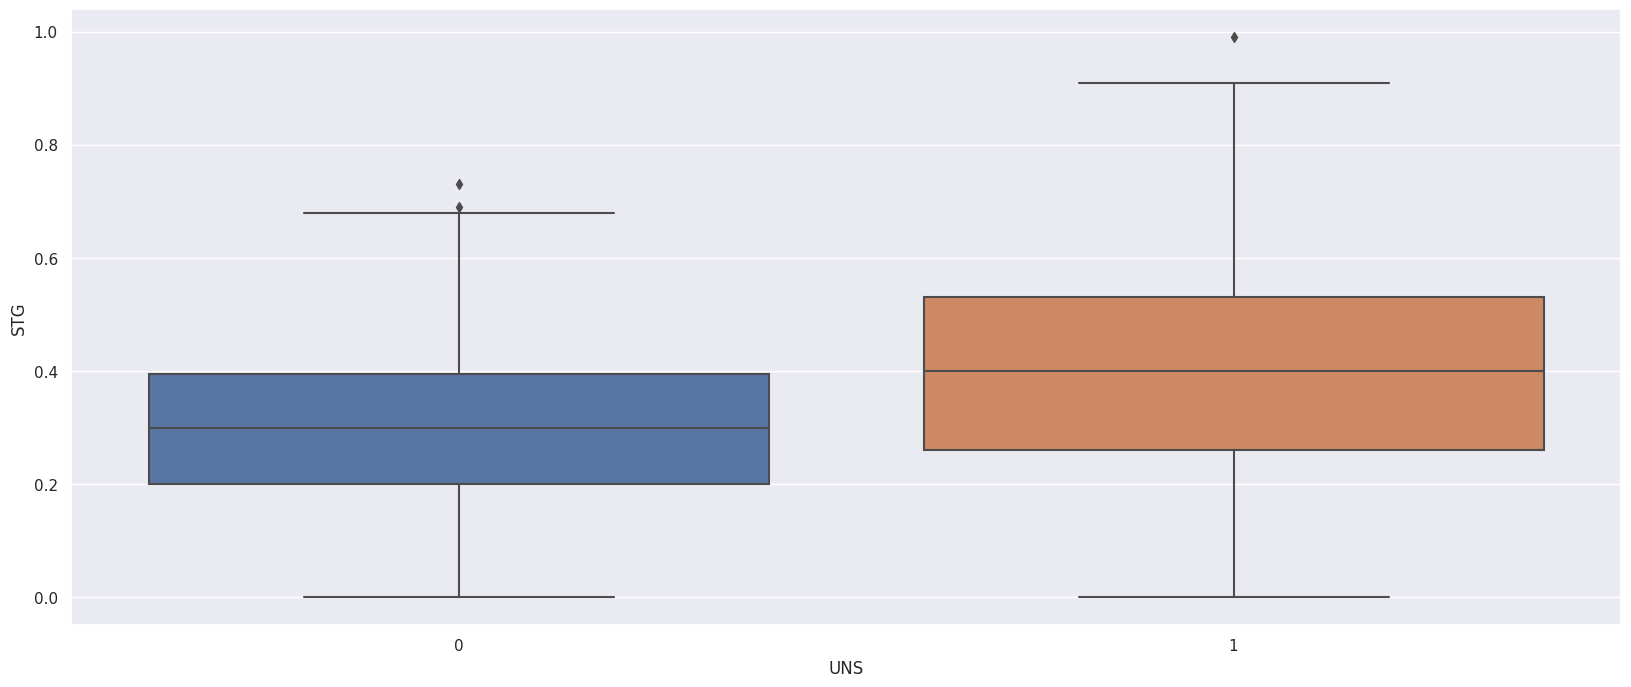

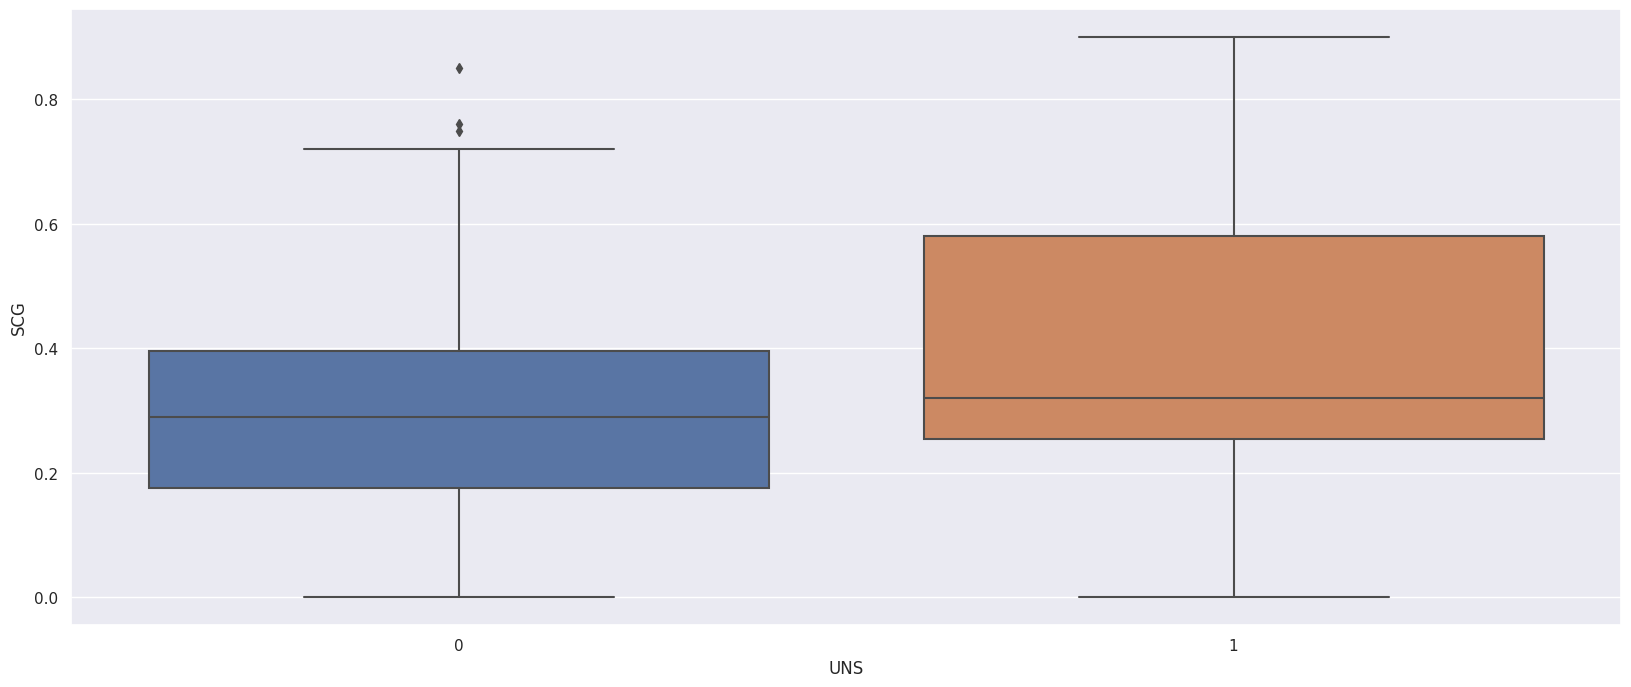

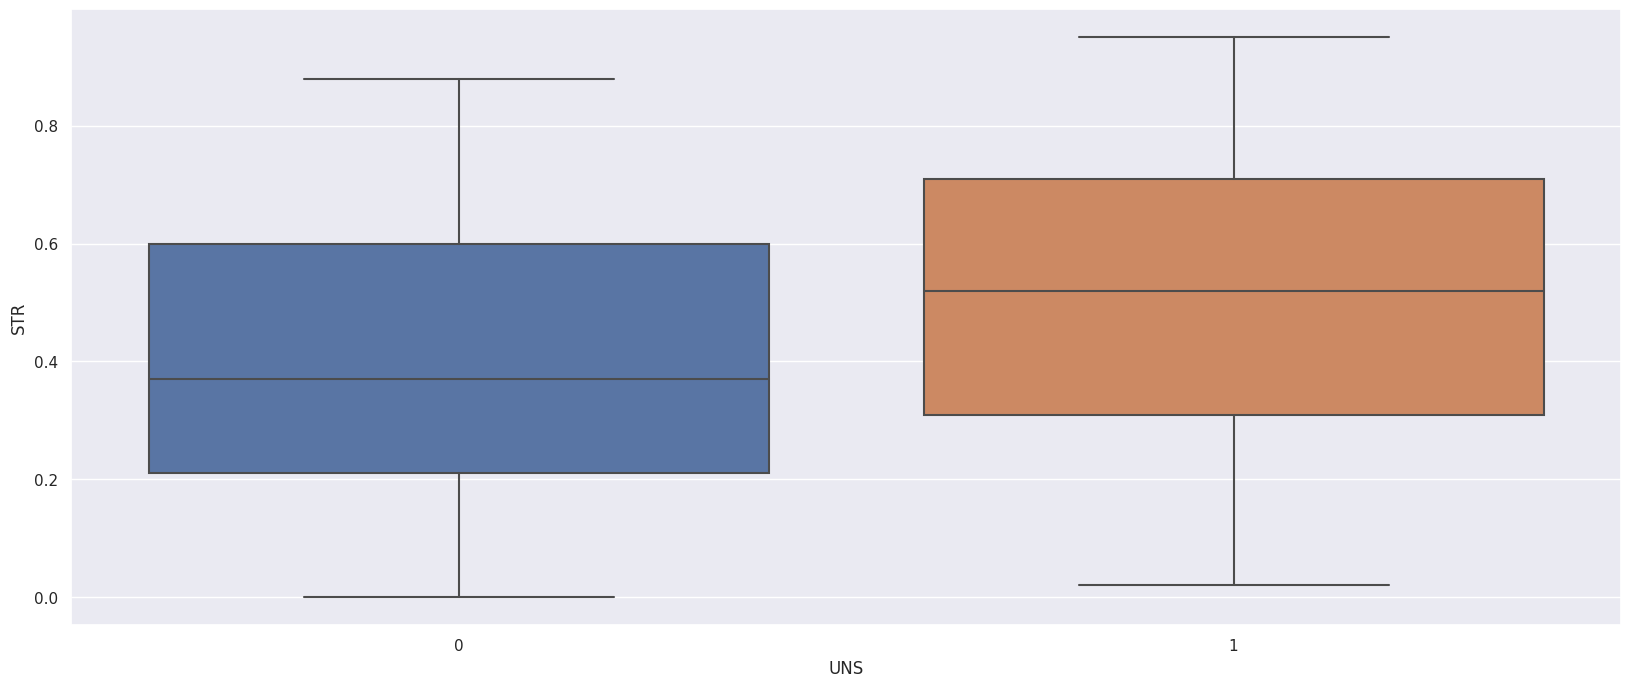

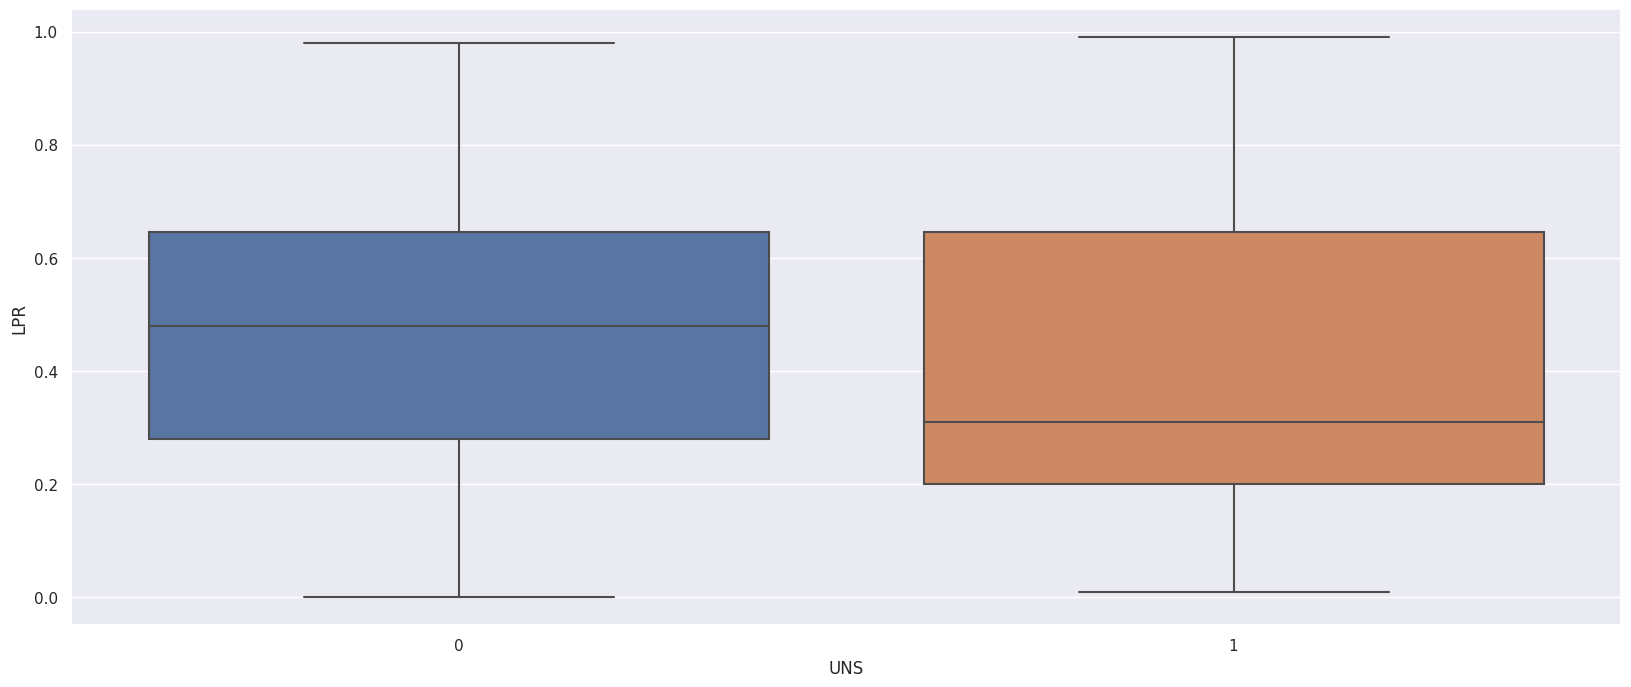

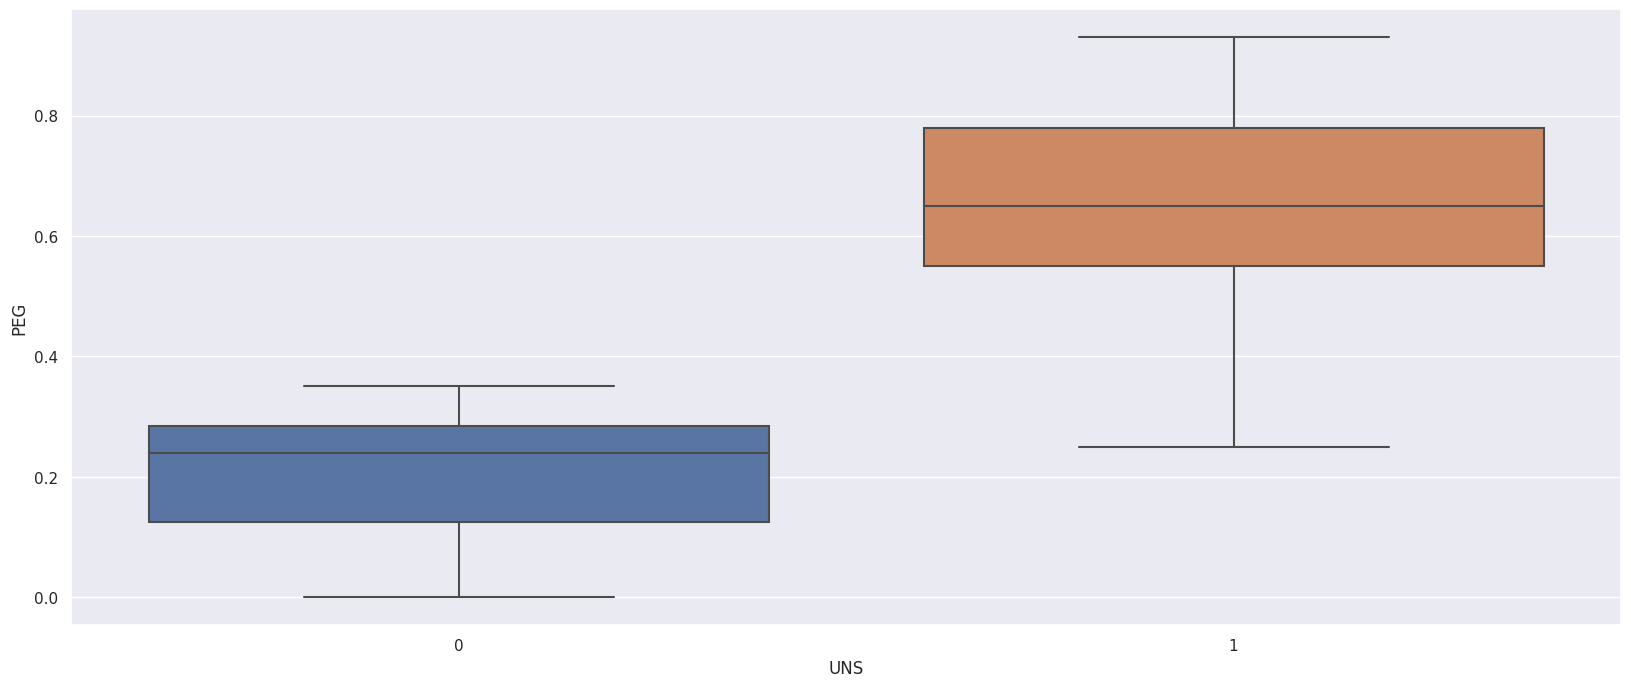

In [15]:
def plot_boxplots(df):
    sns.set(rc={'figure.figsize': (20, 8)})

    for feature_col in df.columns[:-1]:
        sns.boxplot(x=df['UNS'], y=df[feature_col])
        plt.xlabel('UNS')
        plt.ylabel(feature_col)
        plt.show()


plot_boxplots(df)

**Ответ:** вот теперь хоть что-то можно разглядеть, а именно, что наилучшим признаком для деления выборки является PEG. Во-первых, критерий Джини для данного признака имеет наибольшее значение среди всех остальных признаков, что означает, что данный признак наиболее сильно разделяет выборку на два подмножества (см. lineplot), а во-вторых, по boxplot можно увидеть, насколько положительный ящик выше отрицательного (нулевого), соответственно разделить их проще остальных.

Кривые для признаков SCG, STR, LPR и STG практически не изменяются. Это означает, что эти признаки не позволяют эффективно разделить выборку на два поддерева. Кривая PEG выглядит как парабола с ветвями вниз.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ник: Артём Некрасов

B. собственно дерево - [ссылка](https://contest.yandex.ru/contest/56884/run-report/102612632)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

In [17]:
!wget  -O 'agaricus-lepiota.data' -q https://www.dropbox.com/scl/fi/avm0gwfyz2d2rx0w9cjn9/agaricus-lepiota.data?rlkey=ds5exg8eg2mxc7vvoywxbadcs&dl=0
data = pd.read_csv('agaricus-lepiota.data', sep=',')
data['p'] = data['p'].map({'e': 1, 'p': 0}).astype(np.uint8)
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [18]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop(columns=['p'])
y = data['p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
feature_types = ['categorical'] * X_train.shape[1]
tree = DecisionTree(feature_types)
tree.fit(np.array(X_train), np.array(y_train))
y_pred = tree.predict(np.array(X_test))
accuracy_score(np.array(y_test), y_pred)

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [20]:
from hw5code import DecisionTree

In [21]:
!wget  -O 'tic-tac-toe.data' -q https://www.dropbox.com/scl/fi/6g1a2g58dkb8x54fau8e0/tic-tac-toe.data?rlkey=zmxe2w1d3t5ip38rwdpy7x8po&dl=0
tic_tac_toe = pd.read_csv('tic-tac-toe.data', sep=',')
# ссылка из условия кстати не работает, надеюсь не скачал что-то другое

In [22]:
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [23]:
tic_tac_toe['positive'] = tic_tac_toe['positive'].map({'positive': 1, 'negative': 0}).astype(np.uint8)

feature_types = ['categorical'] * (tic_tac_toe.shape[1] - 1)
X = tic_tac_toe.drop(columns=['positive'])
y = tic_tac_toe['positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[Text(0.5, 0, 'Max Depth'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy vs. Max Depth')]

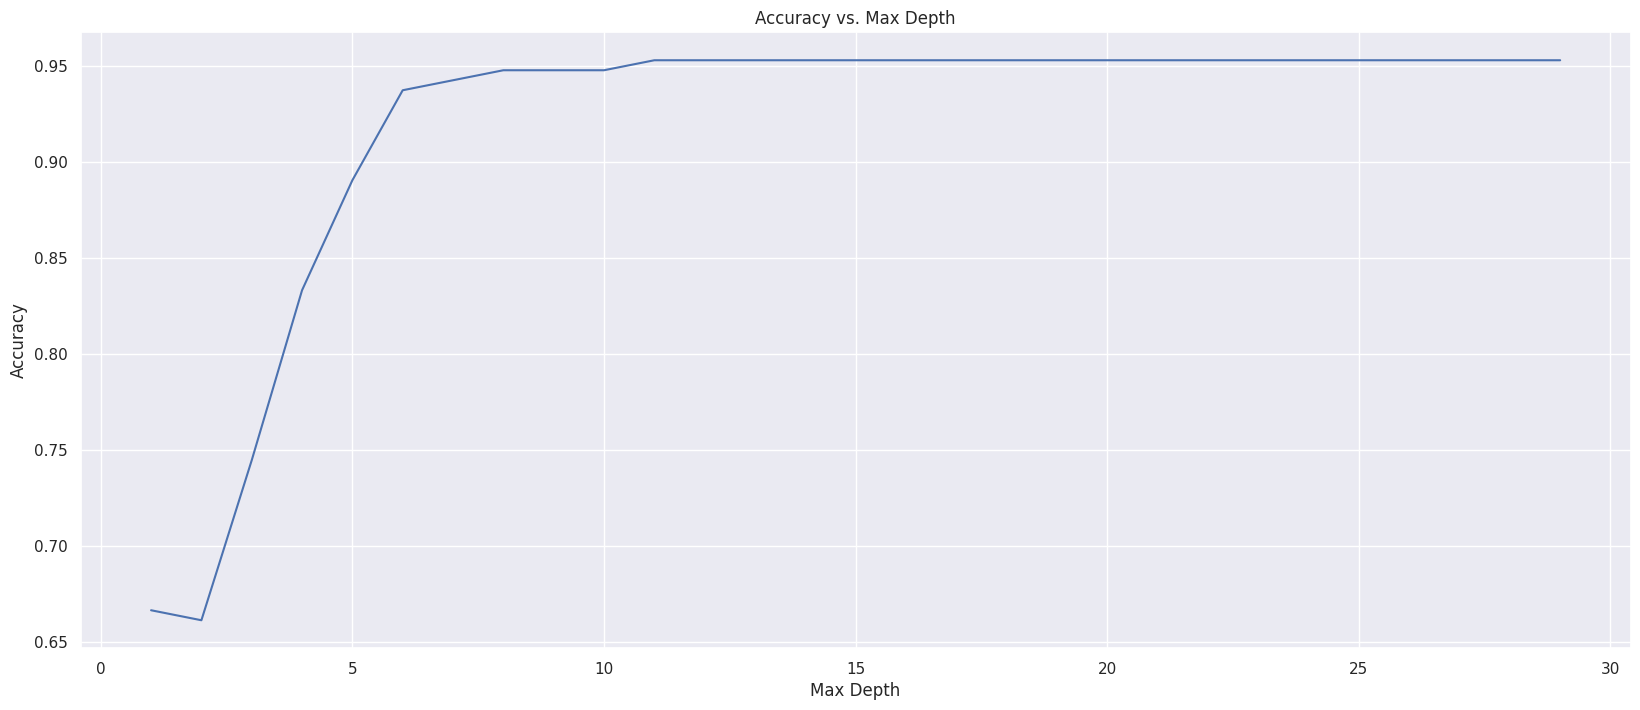

In [24]:
max_depth_space = np.arange(1, 30)
max_depths = []

for max_depth in max_depth_space:
    tree = DecisionTree(feature_types, max_depth=max_depth, min_samples_split=None)
    tree.fit(np.array(X_train), np.array(y_train))
    max_depths.append(accuracy_score(np.array(y_test), tree.predict(np.array(X_test))))

sns.set(rc={'figure.figsize':(20, 8)})
ax = sns.lineplot(x=max_depth_space, y=max_depths)
ax.set(xlabel='Max Depth', ylabel='Accuracy', title='Accuracy vs. Max Depth')

[Text(0.5, 0, 'Min samples split'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy vs. Min samples split')]

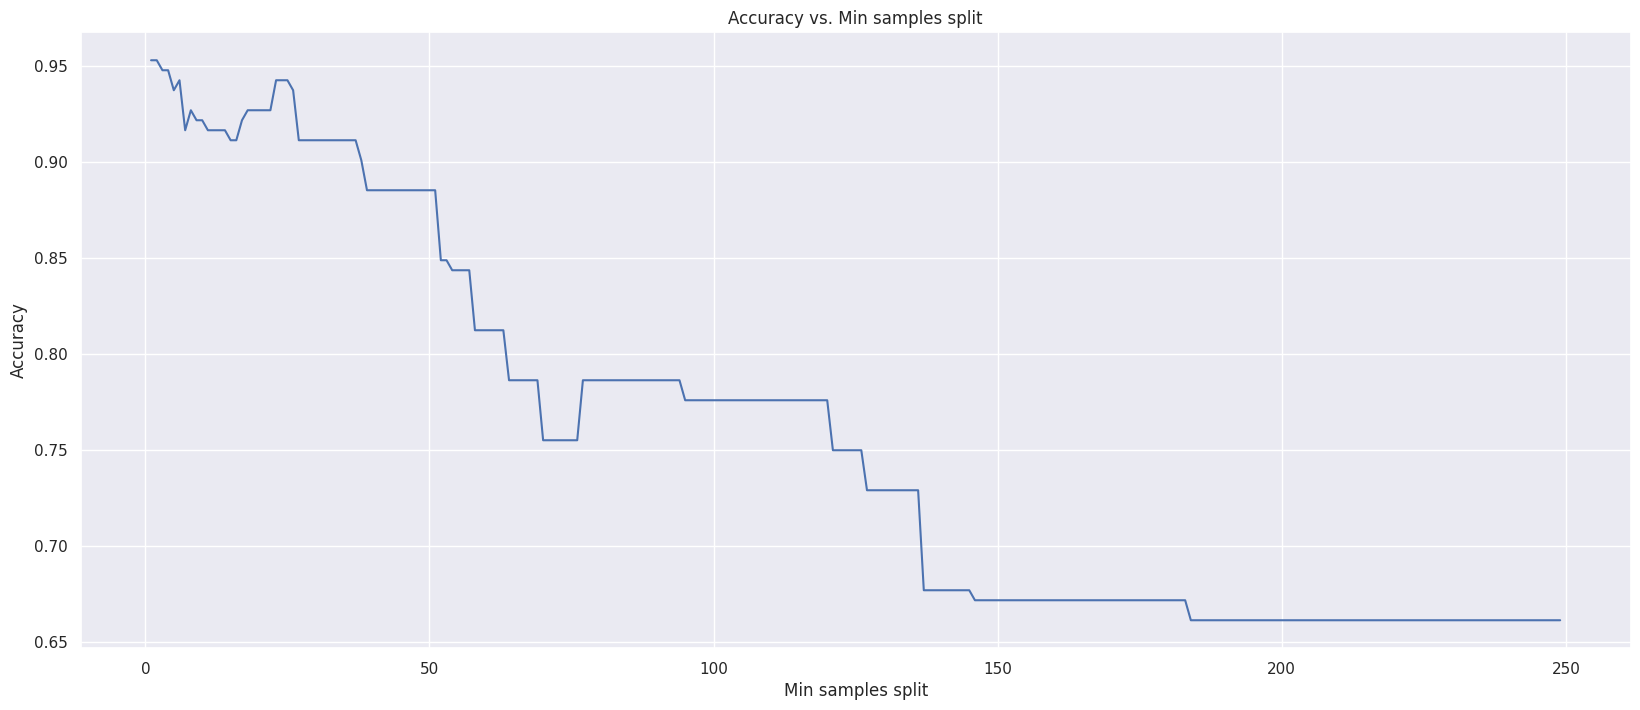

In [25]:
min_samples_split_space = np.arange(1, 250)
min_samples_splits = []

for min_samples_split in min_samples_split_space:
    tree = DecisionTree(feature_types, max_depth=None, min_samples_split=min_samples_split)
    tree.fit(np.array(X_train), np.array(y_train))
    min_samples_splits.append(accuracy_score(np.array(y_test), tree.predict(np.array(X_test))))

sns.set(rc={'figure.figsize':(20, 8)})
ax = sns.lineplot(x=min_samples_split_space, y=min_samples_splits)
ax.set(xlabel='Min samples split', ylabel='Accuracy', title='Accuracy vs. Min samples split')

[Text(0.5, 0, 'Min samples leaf'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy vs. Min samples leaf')]

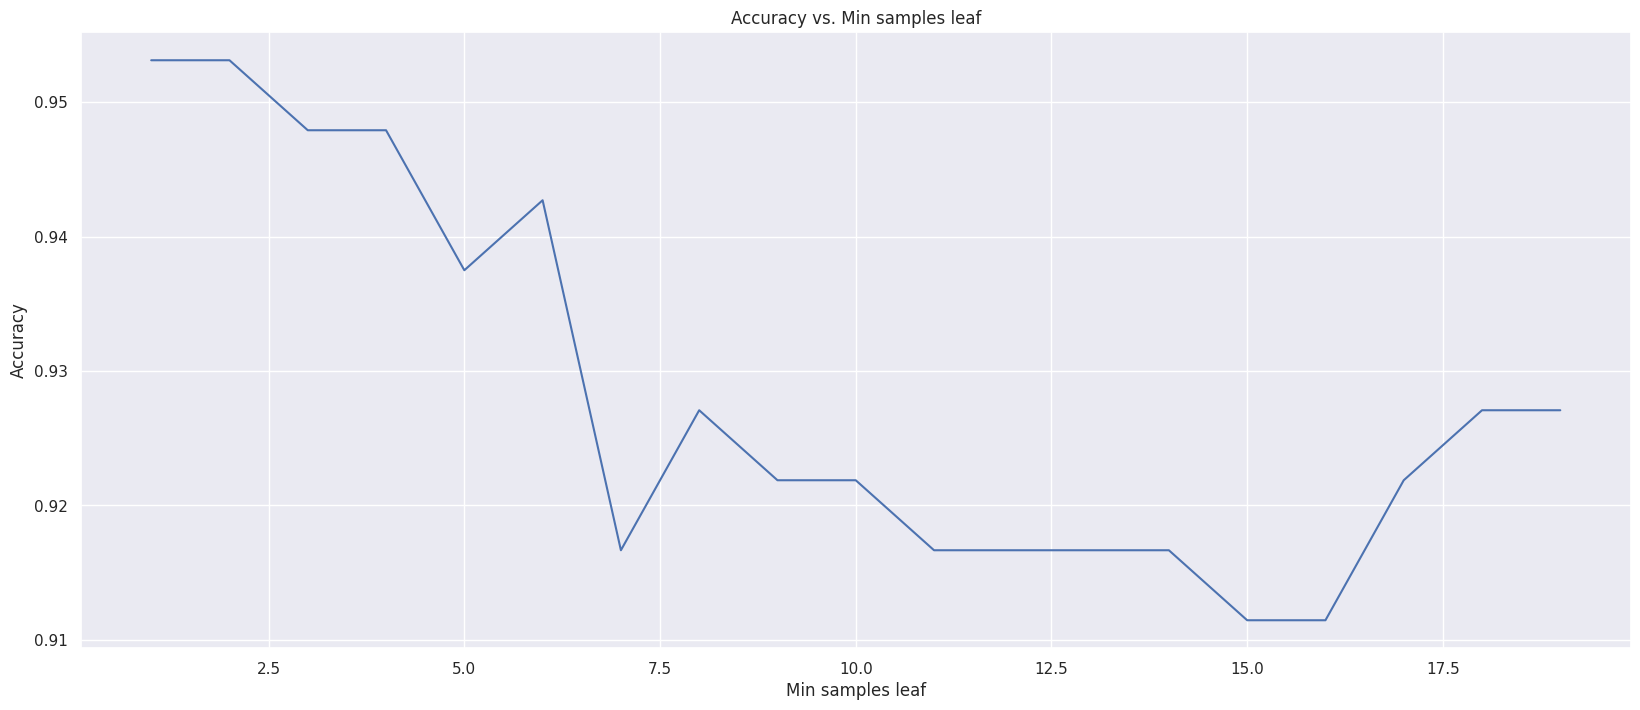

In [26]:
min_samples_leaf_space = np.arange(1, 20)
min_samples_leafs = []

for min_samples_leaf in min_samples_leaf_space:
    tree = DecisionTree(feature_types, max_depth=None, min_samples_leaf=min_samples_leaf)
    tree.fit(np.array(X_train), np.array(y_train))
    min_samples_leafs.append(accuracy_score(np.array(y_test), tree.predict(np.array(X_test))))

sns.set(rc={'figure.figsize':(20, 8)})
ax = sns.lineplot(x=min_samples_leaf_space, y=min_samples_leafs)
ax.set(xlabel='Min samples leaf', ylabel='Accuracy', title='Accuracy vs. Min samples leaf')

* **Max Depth**: Как можно заметить по графику, увеличение глубины дерева до какого-то момента улучшает качество, однако этот эффект не является неограниченным и на определенном значении глубины модель "фиксируется";

* **Min samples split**: С увеличением минимального количества разбиений, обучаемость дерева снижается, но не линейно, а как бы скачками;

* **Min samples leaf**: В целом, тоже можно сказать, что с увеличением min_samples_leaf точность падает.

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [28]:
def evaluate_model(model, X, y):
    scoring = make_scorer(accuracy_score)
    scores = cross_val_score(model, X, y, cv=10, scoring=scoring)
    return np.mean(scores)

In [29]:
# еще разок, чтоб все по красоте
mushrooms = pd.read_csv('agaricus-lepiota.data', sep=',')
mushrooms['p'] = mushrooms['p'].map({'e': 1, 'p': 0}).astype(np.uint8)
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [30]:
mushrooms_data = []
mushrooms = mushrooms.apply(lambda x: LabelEncoder().fit_transform(x))
feature_types = ['real'] * (mushrooms.shape[1] - 1)
X = mushrooms.drop(columns=['p'])
y = mushrooms['p']

mushrooms_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

feature_types = ['categorical'] * (mushrooms.shape[1] - 1)
mushrooms_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [31]:
categorical = list(X.columns)
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])

mushrooms_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [32]:
X = mushrooms.drop(columns=['p'])
y = mushrooms['p']
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

mushrooms_data.append(evaluate_model(DecisionTreeClassifier(), np.array(X), np.array(y)))

In [33]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data', sep=',')
tic_tac_toe['positive'] = tic_tac_toe['positive'].map({'positive': 1, 'negative': 0}).astype(np.uint8)
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,1
1,x,x,x,x,o,o,o,o,x,1
2,x,x,x,x,o,o,o,b,b,1
3,x,x,x,x,o,o,b,o,b,1
4,x,x,x,x,o,o,b,b,o,1


In [34]:
tic_tac_toe_data = []
tic_tac_toe = tic_tac_toe.apply(lambda x: LabelEncoder().fit_transform(x))
feature_types = ['real'] * (tic_tac_toe.shape[1] - 1)
X = tic_tac_toe.drop(columns=['positive'])
y = tic_tac_toe['positive']

tic_tac_toe_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

feature_types = ['categorical'] * (tic_tac_toe.shape[1] - 1)
tic_tac_toe_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [35]:
categorical = list(X.columns)
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])

tic_tac_toe_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [36]:
X = tic_tac_toe.drop(columns=['positive'])
y = tic_tac_toe['positive']
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

tic_tac_toe_data.append(evaluate_model(DecisionTreeClassifier(), np.array(X), np.array(y)))

In [37]:
!wget  -O 'car.data' -q https://www.dropbox.com/scl/fi/254t7gxlybqil6vyvkdwt/car.data?rlkey=y22pzlqowgxxuraf6ogpddvst&dl=0
car = pd.read_csv('car.data', sep=',')
car['unacc'] = car['unacc'].map({'vgood': 1, 'good': 1, 'unacc': 0, 'acc': 0}).astype(np.uint8)
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0


In [38]:
car_data = []
car = car.apply(lambda x: LabelEncoder().fit_transform(x))
feature_types = ['real'] * (car.shape[1] - 1)
X = car.drop(columns=['unacc'])
y = car['unacc']

car_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

feature_types = ['categorical'] * (car.shape[1] - 1)
car_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [39]:
categorical = list(X.columns)
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])

car_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [40]:
X = car.drop(columns=['unacc'])
y = car['unacc']
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

car_data.append(evaluate_model(DecisionTreeClassifier(), np.array(X), np.array(y)))

In [41]:
!wget  -O 'nursery.data' -q https://www.dropbox.com/scl/fi/pe1qv48h8hx05704gphoj/nursery.data?rlkey=7jj80yo3ycy5nwbjczchzjrh3&dl=0
nursery = pd.read_csv('nursery.data', sep=',')
nursery['recommend'] = nursery['recommend'].map({'very_recom': 1, 'priority': 1, 'spec_prior': 1, 'not_recom': 0, 'recommend': 0}).astype(np.uint8)
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0


In [42]:
nursery_data = []
nursery = nursery.apply(lambda x: LabelEncoder().fit_transform(x))
feature_types = ['real'] * (nursery.shape[1] - 1)
X = nursery.drop(columns=['recommend'])
y = nursery['recommend']

nursery_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

feature_types = ['categorical'] * (nursery.shape[1] - 1)
nursery_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [43]:
categorical = list(X.columns)
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False), categorical)
], remainder='passthrough')

X = column_transformer.fit_transform(X)
feature_types = ['real'] * (X.shape[1])

nursery_data.append(evaluate_model(DecisionTree(feature_types), np.array(X), np.array(y)))

In [44]:
X = nursery.drop(columns=['recommend'])
y = nursery['recommend']
X = X.apply(lambda x: LabelEncoder().fit_transform(x))

nursery_data.append(evaluate_model(DecisionTreeClassifier(), np.array(X), np.array(y)))

In [45]:
result = {}
result['mushrooms'], result['tic_tac_toe'], result['car'], result['nursery'] = mushrooms_data, tic_tac_toe_data, car_data, nursery_data

result_df = pd.DataFrame.from_dict(result, orient='index', columns=['DecisionTree Real', 'DecisionTree Categorical', 'DecisionTree Real + ohe', 'sklearn.DecisionTreeClassifier'])
result_df

,DecisionTree Real,DecisionTree Categorical,DecisionTree Real + ohe,sklearn.DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999631,0.967157
tic_tac_toe,0.462697,0.549265,0.553520,0.782971
car,0.942600,0.967519,0.921767,0.944952
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

### mushrooms:
1. DecisionTree Categorical
2. DecisionTree Real + ohe
3. DecisionTree Real
4. sklearn.DecisionTreeClassifier

Лучшим оказался алгоритм DecisionTree, считающий все признаки категориальными. Далее алгоритм с OHE, который преобразовывает опять же категориальные признаки. На удивление, дерево из sklearn показало себя хуже всего.

### tic_tac_toe:
1. sklearn.DecisionTreeClassifier
2. DecisionTree Real + ohe
3. DecisionTree Categorical
4. DecisionTree Real

Можно сказать, что результаты получились неоднозначными (это сугубо сравнивая с первым датасетом). Наилучшим образом показало себя дерево из sklearn (хотя тут тоже все признаки категориальные), а алгоритм DecisionTree, считающий все признаки категориальными лишь на 3 месте. Абсолютный проигравшим считаем алгоритм,признающий все признаки за вещественные. Самый жесткий датасет.

### car:
1. DecisionTree Categorical
2. sklearn.DecisionTreeClassifier
3. DecisionTree Real
4. DecisionTree Real + ohe

В этом датасете чемпионом становится алгоритм DecisionTree, считающий все признаки категориальными. Опять же во всех датасетах все пирзнаки категориальные (исходя из описаний данных на сайте) и лидирующие позиции этот способ занимает весьма закономерно. Худший DecisionTree Real + ohe.

### nursery:
1. DecisionTree Categorical
2. DecisionTree Real / sklearn.DecisionTreeClassifier
3. sklearn.DecisionTreeClassifier / DecisionTree Real
4. DecisionTree Real + ohe

И снова побеждает DecisionTree Categorical, а проигрывает DecisionTree Real + ohe. 2 - 3 место делят между собой DecisionTree Real и sklearn.DecisionTreeClassifier, показавшие одинаковый результат.


## Общий итог:
Наилучшим образом (на данных датасетах) показал себя алгоритм DecisionTree, считающий все признаки категориальными (что логично для категориальных-то датасетов). Хуже всех проявил себя DecisionTree Real скорее всего по той же причине.


Относительно компоненты случайности, результаты могут варьироваться в зависимости от разбиения на фолды в кросс-валидации. Для улучшения работы алгоритмов можно подобрать другие гиперпараметры или, например, усреднить результаты на нескольких случайных разбиениях, также можно попробовать увеличить число фолдов.








Вставьте что угодно, описывающее ваши впечатления от этого задания: